In [1]:
import pandas as pd

data = pd.read_csv('data/android_bids_us.csv')
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0


# Convert UTC Time To Local Time

In [2]:
from datetime import datetime, timedelta
from dateutil import tz

state2timezone = { 'AK': 'US/Alaska', 'AL': 'US/Central', 'AR': 'US/Central', 'AS': 'US/Samoa', 'AZ': 'US/Mountain', 'CA': 'US/Pacific', 'CO': 'US/Mountain', 'CT': 'US/Eastern', 'DC': 'US/Eastern', 'DE': 'US/Eastern', 'FL': 'US/Eastern', 'GA': 'US/Eastern', 'GU': 'Pacific/Guam', 'HI': 'US/Hawaii', 'IA': 'US/Central', 'ID': 'US/Mountain', 'IL': 'US/Central', 'IN': 'US/Eastern', 'KS': 'US/Central', 'KY': 'US/Eastern', 'LA': 'US/Central', 'MA': 'US/Eastern', 'MD': 'US/Eastern', 'ME': 'US/Eastern', 'MI': 'US/Eastern', 'MN': 'US/Central', 'MO': 'US/Central', 'MP': 'Pacific/Guam', 'MS': 'US/Central', 'MT': 'US/Mountain', 'NC': 'US/Eastern', 'ND': 'US/Central', 'NE': 'US/Central', 'NH': 'US/Eastern', 'NJ': 'US/Eastern', 'NM': 'US/Mountain', 'NV': 'US/Pacific', 'NY': 'US/Eastern', 'OH': 'US/Eastern', 'OK': 'US/Central', 'OR': 'US/Pacific', 'PA': 'US/Eastern', 'PR': 'America/Puerto_Rico', 'RI': 'US/Eastern', 'SC': 'US/Eastern', 'SD': 'US/Central', 'TN': 'US/Central', 'TX': 'US/Central', 'UT': 'US/Mountain', 'VA': 'US/Eastern', 'VI': 'America/Virgin', 'VT': 'US/Eastern', 'WA': 'US/Pacific', 'WI': 'US/Central', 'WV': 'US/Eastern', 'WY': 'US/Mountain', '' : 'US/Pacific', '--': 'US/Pacific' }
data["UTC_datetime"] = pd.to_datetime(round(data['utc_time']/1000), unit='s')
days = ['mon','tue','wed','thu','fri','sat','sun']

local_time_vec = []
local_time_vec_naive_vec = []
weekday_vec = []
hour_vec = []
for idx, t in enumerate(data["UTC_datetime"]):
    local_with_tz = t.tz_localize(tz=state2timezone[data['user_state'][idx]],ambiguous=True)
    utc_time = str(local_with_tz)[0:19]
    utc_time = datetime.strptime(utc_time, '%Y-%m-%d %H:%M:%S')
    offset = str(local_with_tz)[19:22]
    local_time_naive = utc_time + timedelta(hours = int(offset))
    local_time_vec.append(local_with_tz)
    local_time_vec_naive_vec.append(local_time_naive)
    hour_vec.append(local_time_naive.hour)
    weekday_vec.append(days[local_time_naive.weekday()])   
data['local_time_naive'] = local_time_vec_naive_vec
data['local_time'] = local_time_vec
data['local hour'] = hour_vec
data['local_weekday'] = weekday_vec 

# Drop Duplication in bidid

<p style="line-height:1.75;font-size:16px">
Sort data by bidid and click And Romove the occerence where the click=0 (The time user was not clicked)

In [3]:
data.sort_values(by=['bidid', 'click'],inplace=True)

In [4]:
data.head(10)

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,UTC_datetime,local_time_naive,local_time,local hour,local_weekday
2231911,00000420-0c1b-4af0-b0ff-c0523df98066,1540494853896,com.casino.werewolfslots,CA,T-Mobile USA,LG,MP260,7.0,720,1280,chartboost,0,2018-10-25 19:14:14,2018-10-25 12:14:14,2018-10-25 19:14:14-07:00,12,thu
2233764,00000420-0c1b-4af0-b0ff-c0523df98066,1540494902787,com.casino.werewolfslots,CA,T-Mobile USA,LG,MP260,7.0,720,1280,chartboost,1,2018-10-25 19:15:03,2018-10-25 12:15:03,2018-10-25 19:15:03-07:00,12,thu
1447157,00000f76-1b64-4e47-b496-a5fbaac971c3,1536317677683,com.fiogonia.yatzy,IN,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0,2018-09-07 10:54:38,2018-09-07 06:54:38,2018-09-07 10:54:38-04:00,6,fri
3055114,0000106f-295a-46c5-8c84-77a08c8b862e,1539549781120,com.toucangames.scary.clown.survival.hauntedgames,CA,Spectrum,LG,TP260,7.0,720,1280,chartboost,0,2018-10-14 20:43:01,2018-10-14 13:43:01,2018-10-14 20:43:01-07:00,13,sun
704011,00001b42-3048-4faa-8c51-933c3f99ad73,1540657569263,com.fun.crazy.supermarket.bakery.cashier,CA,Comcast Cable,ALCATEL ONE TOUCH,5010G,6.0,480,854,chartboost,0,2018-10-27 16:26:09,2018-10-27 09:26:09,2018-10-27 16:26:09-07:00,9,sat
1470444,000025f8-530c-4eef-9b55-7a423f0f37d0,1540417333590,com.newsbooks.home,CA,Spectrum Business,LG,MS631,6.0,1280,720,chartboost,0,2018-10-24 21:42:14,2018-10-24 14:42:14,2018-10-24 21:42:14-07:00,14,wed
2807004,00002e61-945b-4201-a81c-9f6947b0d11a,1541029815989,com.dreamgame.candyville,FL,AT&T Wireless,LG,M150,7.0,854,480,chartboost,0,2018-10-31 23:50:16,2018-10-31 19:50:16,2018-10-31 23:50:16-04:00,19,wed
1290410,00002fe1-aa2c-4194-b168-47d03aa4cf8b,1534287604739,toy.smash.blocks.crush,KY,Spectrum,NaN,NaN,6.0.1,1280,720,chartboost,0,2018-08-14 23:00:05,2018-08-14 19:00:05,2018-08-14 23:00:05-04:00,19,tue
1267465,00002fe1-aa2c-4194-b168-47d03aa4cf8b,1534287672157,toy.smash.blocks.crush,KY,Spectrum,NaN,NaN,6.0.1,1280,720,chartboost,1,2018-08-14 23:01:12,2018-08-14 19:01:12,2018-08-14 23:01:12-04:00,19,tue
1012075,000033ed-1290-47af-87ec-5b3ec3631808,1534116514869,com.kiloo.subwaysurf,CA,AT&T Wireless,NaN,NaN,7.0,1280,720,chartboost,0,2018-08-12 23:28:35,2018-08-12 16:28:35,2018-08-12 23:28:35-07:00,16,sun


In [5]:
data = data.drop_duplicates(subset=['bidid'], keep='last')

# Ratio for clicks

In [6]:
clicks=data['click'].value_counts()

In [7]:
ratio = (clicks[1]/len(data))*100
ratio

7.259269146156809

#  Add App info to the Data

<p style="line-height:1.75;font-size:16px">
Loading the app info file

In [8]:
from zipfile import ZipFile
import pickle

app_details = ZipFile("data/play_apps.zip")
app_files = ZipFile.namelist(app_details)

<p style="line-height:1.75;font-size:16px">
Read only the informative columns

In [9]:
import numpy as np
import pandas as pd

category_name_df=pd.DataFrame(' ' , columns=['category','reviews','score','free','installs', 
                                             'app_id'] , index =np.arange(len(app_files)))
for indx ,file in enumerate(app_files):
    pickled_file = pickle.loads(app_details.read(file))
    category_name_df['category'][indx] = pickled_file.get('category')
    category_name_df['score'][indx] = pickled_file.get('score')
    category_name_df['free'][indx] = pickled_file.get('free')
    category_name_df['reviews'][indx] = pickled_file.get('reviews')
    category_name_df['installs'][indx] = pickled_file.get('installs')
    category_name_df['app_id'][indx] = pickled_file.get('app_id')

In [10]:
category_name_df.head(3)

,category,reviews,score,free,installs,app_id
0,[PHOTOGRAPHY],435,4.0,True,"100,000+",a008.com.fc2.blog.androidkaihatu.datecamera2
1,[TOOLS],1432,4.6,True,"50,000+",a201706011153.xsky.txvpn
2,[PRODUCTIVITY],1362,4.6,True,"50,000+",a201706021616.vpn.turbovpn


<p style="line-height:1.75;font-size:16px">
Change Category column to String 

In [11]:
category_name_df['category'] = category_name_df['category'].map(lambda x: str(x)[2:-2])

In [12]:
category_name_df.sample(3)

,category,reviews,score,free,installs,app_id
19109,GAME_PUZZLE,1462,4.2,True,"100,000+",com.snapbreak.strangercases
23586,ART_AND_DESIGN,152,4.2,True,"50,000+",constructionsolution.com.diy
24902,GAME_PUZZLE,83,4.2,True,"5,000+",jp.cgate.honeycomb.puzzle.game


In [13]:
category_name_df['category'] = category_name_df['category'].astype("category")

In [14]:
category_name_df['category'].dtype

CategoricalDtype(categories=['ART_AND_DESIGN', 'ART_AND_DESIGN', 'FAMILY_CREATE',
                  'ART_AND_DESIGN', 'FAMILY_EDUCATION', 'AUTO_AND_VEHICLES',
                  'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS',
                  'COMICS', 'FAMILY_CREATE', 'COMICS', 'FAMILY_EDUCATION',
                  ...
                  'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL',
                  'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS',
                  'VIDEO_PLAYERS', 'FAMILY_MUSICVIDEO', 'WEATHER'],
, ordered=False)

# Merging the data and the app info on app_id column

In [15]:
df = data.merge(category_name_df, on='app_id', how='left')
df.sample(5)

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,...,UTC_datetime,local_time_naive,local_time,local hour,local_weekday,category,reviews,score,free,installs
2143475,bae3455c-a07f-41ed-a819-19f279665bf4,1538253566245,com.jaboston.catgames,AZ,Cox Communications,Samsung,SM-G965U,8.0.0,1080,1920,...,2018-09-29 20:39:26,2018-09-29 14:39:26,2018-09-29 20:39:26-06:00,14,sat,GAME_ARCADE,5742,3.0,True,"1,000,000+"
88289,07bdcf4d-9a06-42dd-a163-0fefaa24a56a,1541542514246,com.mountain.sniper.shooting.ray,TX,T-Mobile USA,T-Mobile,5049W,7.0,720,1280,...,2018-11-06 22:15:14,2018-11-06 16:15:14,2018-11-06 22:15:14-06:00,16,tue,GAME_ACTION,85133,4.3,True,"10,000,000+"
1626724,8de7fe27-f33a-4a54-b65b-f7bdbf1dd2ce,1533764065380,com.ray3d.shootsniper,MS,AT&T U-verse,NaN,NaN,8.0.0,1080,1920,...,2018-08-08 21:34:25,2018-08-08 16:34:25,2018-08-08 21:34:25-05:00,16,wed,GAME_ACTION,333222,4.3,True,"50,000,000+"
1964704,ab4c6794-64db-40af-8aec-e0114bd65c41,1539648293635,com.gia.iloveftd,FL,AT&T U-verse,LG,MS550,7.0,1280,720,...,2018-10-16 00:04:54,2018-10-15 20:04:54,2018-10-16 00:04:54-04:00,20,mon,GAME_PUZZLE,39519,4.6,True,"1,000,000+"
561416,310520a4-922d-46b6-8456-2e37d77abfc9,1539126450701,com.frontlinegamesstudios.call.of.zombies.worl...,FL,Spectrum,LG,MS210,7.0,720,1280,...,2018-10-09 23:07:31,2018-10-09 19:07:31,2018-10-09 23:07:31-04:00,19,tue,GAME_ACTION,120,3.8,True,"10,000+"


# Stay with the 60 most frequent Categories

In [16]:
#get the most 60 catagories
cat_list = df['category'].value_counts()[:60].index.tolist()

In [17]:
#drop
df.drop(df[~df['category'].isin(cat_list)].index, inplace=True)

# Droping irrelevant columns

In [18]:
df = df.drop(['bidid', 'app_id', 'marketplace'], axis=1)

<p style="line-height:1.75;font-size:16px">
Drop empy rows (Can not fill it)

In [19]:
df.dropna(inplace=True)

# Ratio for clicks is now higher 

In [20]:
clicks= df['click'].value_counts()
ratio = (clicks[1]/len(df))*100
ratio

7.709981092158754

<p style="line-height:1.75;font-size:16px">
Remove string from installs column and convert to int

In [21]:
df['installs'] = df['installs'].str.replace(r'\D', '').astype(int)

/tmp/ipykernel_36755/3396957227.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['installs'] = df['installs'].str.replace(r'\D', '').astype(int)


<p style="line-height:1.75;font-size:16px">
Convert columns Score and Reviews to int

In [22]:
df[['reviews','score']] = df[['reviews', 'score']].apply(pd.to_numeric)

# Exploring the Data

<p style="line-height:1.75;font-size:16px">
First sampling the data for plotting

In [56]:
data_sample = df.sample(50000)

# Score VS Clicks

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.6'),
  Text(2, 0, '1.7'),
  Text(3, 0, '1.9'),
  Text(4, 0, '2.0'),
  Text(5, 0, '2.3'),
  Text(6, 0, '2.4'),
  Text(7, 0, '2.5'),
  Text(8, 0, '2.6'),
  Text(9, 0, '2.7'),
  Text(10, 0, '2.8'),
  Text(11, 0, '2.9'),
  Text(12, 0, '3.0'),
  Text(13, 0, '3.1'),
  Text(14, 0, '3.2'),
  Text(15, 0, '3.3'),
  Text(16, 0, '3.4'),
  Text(17, 0, '3.5'),
  Text(18, 0, '3.6'),
  Text(19, 0, '3.7'),
  Text(20, 0, '3.8'),
  Text(21, 0, '3.9'),
  Text(22, 0, '4.0'),
  Text(23, 0, '4.1'),
  Text(24, 0, '4.2'),
  Text(25, 0, '4.3'),
  Text(26, 0, '4.4'),
  Text(27, 0, '4.5'),
  Text(28, 0, '4.6'),
  Text(29, 0, '4.7'),
  Text(30, 0, '4.8'),
  Text(31, 0, '4.9'),
  Text(32, 0, '5.0')])

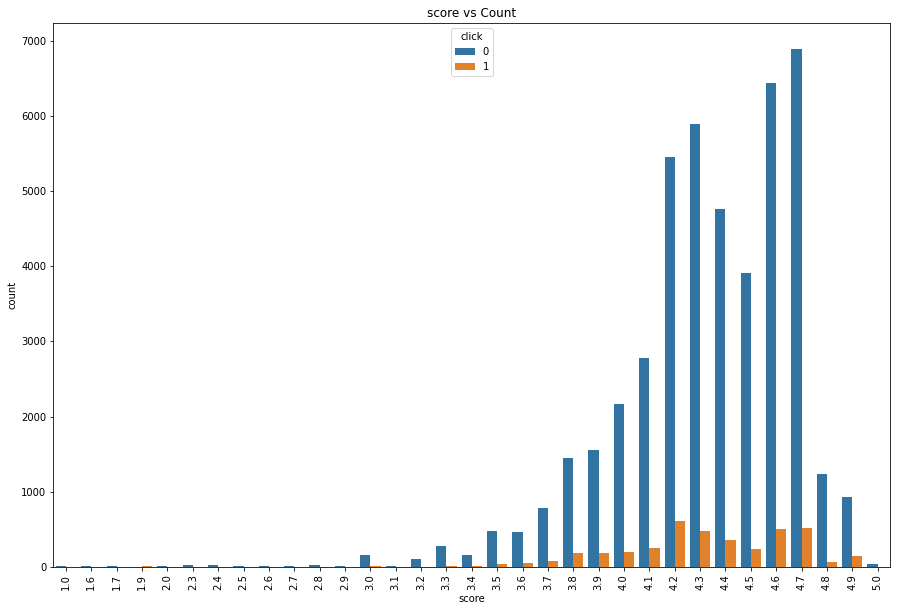

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(15,10))
sns.countplot(x="score", data=data_sample, hue ="click")
plt.title("score vs Count")
plt.xticks(rotation=90)

<p style="line-height:1.75;font-size:16px">
Clicks are in the range of Score 3.3-5, So Removing rows where score is smaller than 2.9

In [23]:
df = df.drop(df[df.score < 2.9].index)

In [59]:
data_sample = df.sample(50000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '2.9'),
  Text(1, 0, '3.0'),
  Text(2, 0, '3.1'),
  Text(3, 0, '3.2'),
  Text(4, 0, '3.3'),
  Text(5, 0, '3.4'),
  Text(6, 0, '3.5'),
  Text(7, 0, '3.6'),
  Text(8, 0, '3.7'),
  Text(9, 0, '3.8'),
  Text(10, 0, '3.9'),
  Text(11, 0, '4.0'),
  Text(12, 0, '4.1'),
  Text(13, 0, '4.2'),
  Text(14, 0, '4.3'),
  Text(15, 0, '4.4'),
  Text(16, 0, '4.5'),
  Text(17, 0, '4.6'),
  Text(18, 0, '4.7'),
  Text(19, 0, '4.8'),
  Text(20, 0, '4.9'),
  Text(21, 0, '5.0')])

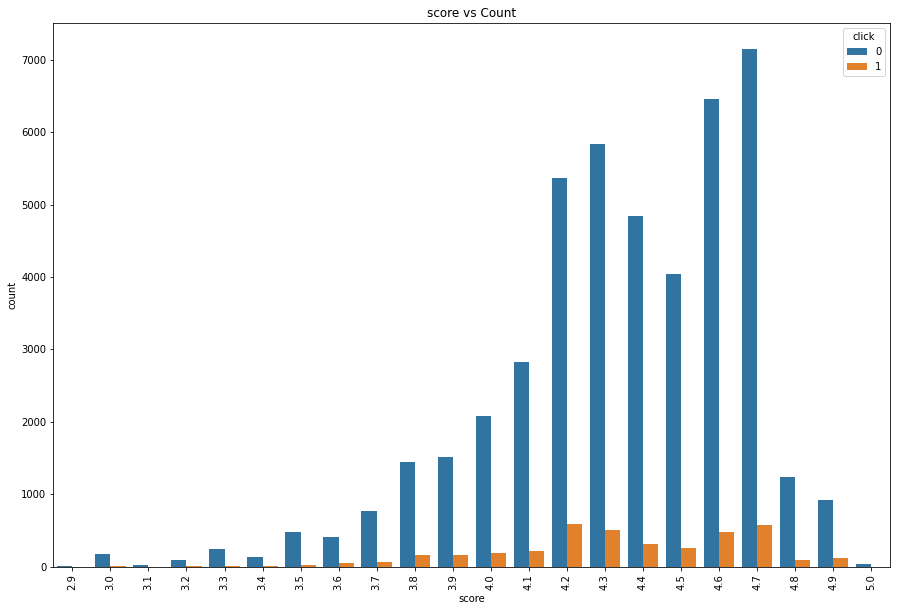

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(x="score", data=data_sample, hue ="click")
plt.title("score vs Count")
plt.xticks(rotation=90)

## Installation VS Clicks


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '100'),
  Text(1, 0, '500'),
  Text(2, 0, '1000'),
  Text(3, 0, '5000'),
  Text(4, 0, '10000'),
  Text(5, 0, '50000'),
  Text(6, 0, '100000'),
  Text(7, 0, '500000'),
  Text(8, 0, '1000000'),
  Text(9, 0, '5000000'),
  Text(10, 0, '10000000'),
  Text(11, 0, '50000000'),
  Text(12, 0, '100000000')])

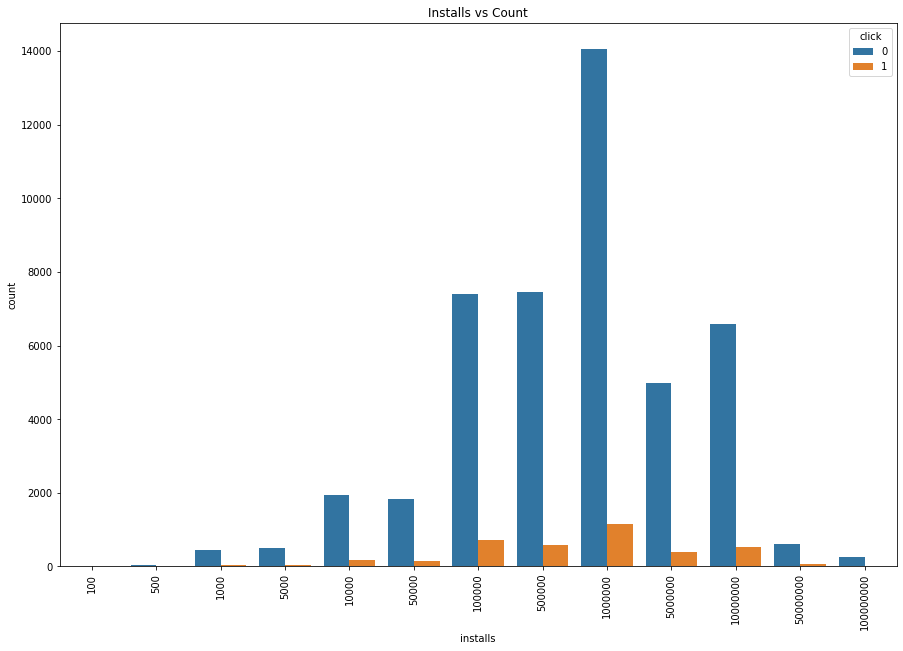

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(x="installs", data=data_sample, hue ="click")
plt.title("Installs vs Count")
plt.xticks(rotation=90)

<p style="line-height:1.75;font-size:16px">
Apps with installations between 1000 to 10M are more lickly to be clicked

## Free VS Click 

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

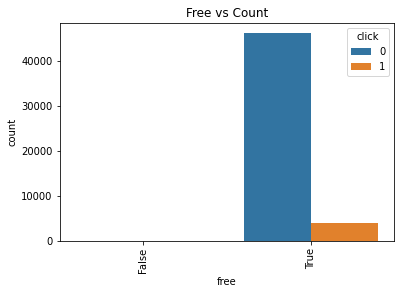

In [29]:
sns.countplot(x="free", data=data_sample, hue ="click")
plt.title("Free vs Count")
plt.xticks(rotation=90)

<p style="line-height:1.75;font-size:16px">
There is no rows with Free value = False
maybe we should remove this column 

In [30]:
len(df[df['free'] == 'False'])

0

<p style="line-height:1.75;font-size:16px">
Droping the Free column

In [24]:
df = df.drop(['free'],axis=1)

In [61]:
data_sample = df.sample(70000)

## Reviews VS Click 

(array([   0,    1,    2, ..., 2886, 2887, 2888]),
 [Text(0, 0, '0'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '35'),
  Text(35, 0, '36'),
  Text(36, 0, '37'),
  Text(37, 0, '38'),
  Text(38, 0, '39'),
  Text(39, 0, '40'),
  Text(40, 0, '41'),
  Text(41, 0, '42'),
  Text(42, 0, '43'),
  Text(43, 0, '44'),
  Text(44, 0, '45'),
  Text(45, 0, '46'),
  

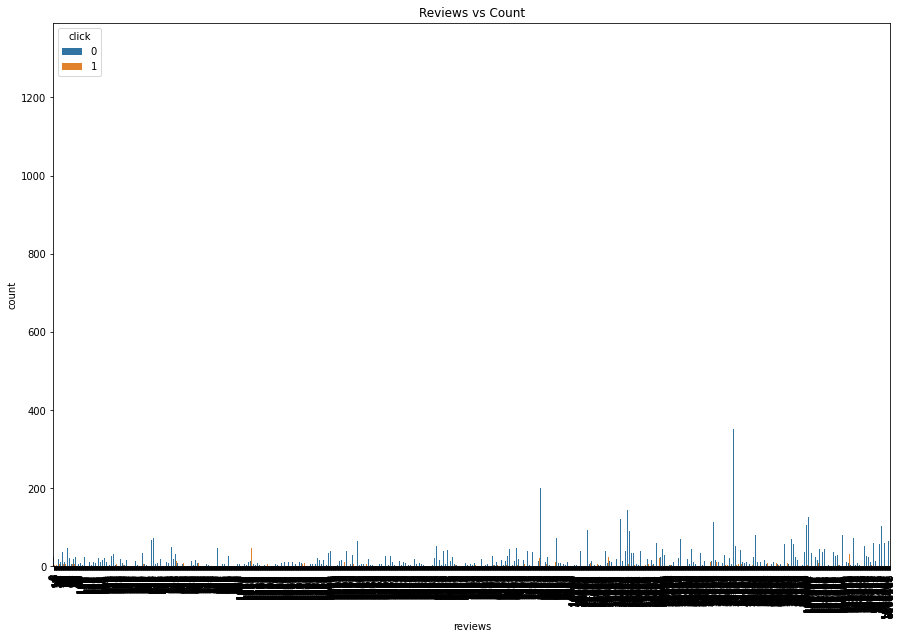

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(x="reviews", data=data_sample, hue ="click")
plt.title("Reviews vs Count")
plt.xticks(rotation=90)

<p style="line-height:1.75;font-size:16px">
Reviews Column seem like a noise, So we remove it

In [25]:
df = df.drop(['reviews'],axis=1)
data_sample = df.sample(70000)

# Local Hour VS Clicks

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

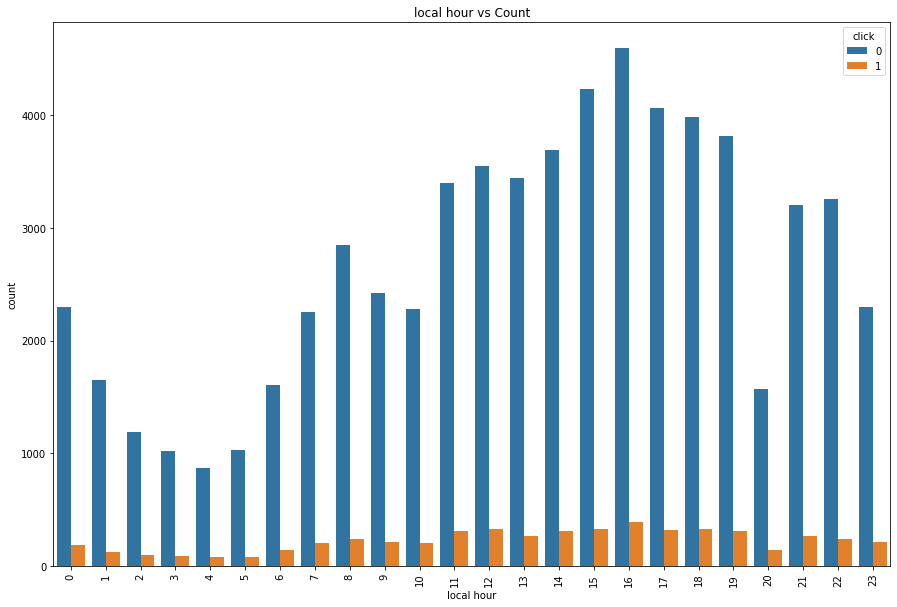

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(x="local hour", data=data_sample, hue ="click")
plt.title("local hour vs Count")
plt.xticks(rotation=90)

<p style="line-height:1.75;font-size:16px">
Relation exist between hour to clicks

# Weekday VS Clicks

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'thu'),
  Text(1, 0, 'wed'),
  Text(2, 0, 'sun'),
  Text(3, 0, 'mon'),
  Text(4, 0, 'sat'),
  Text(5, 0, 'tue'),
  Text(6, 0, 'fri')])

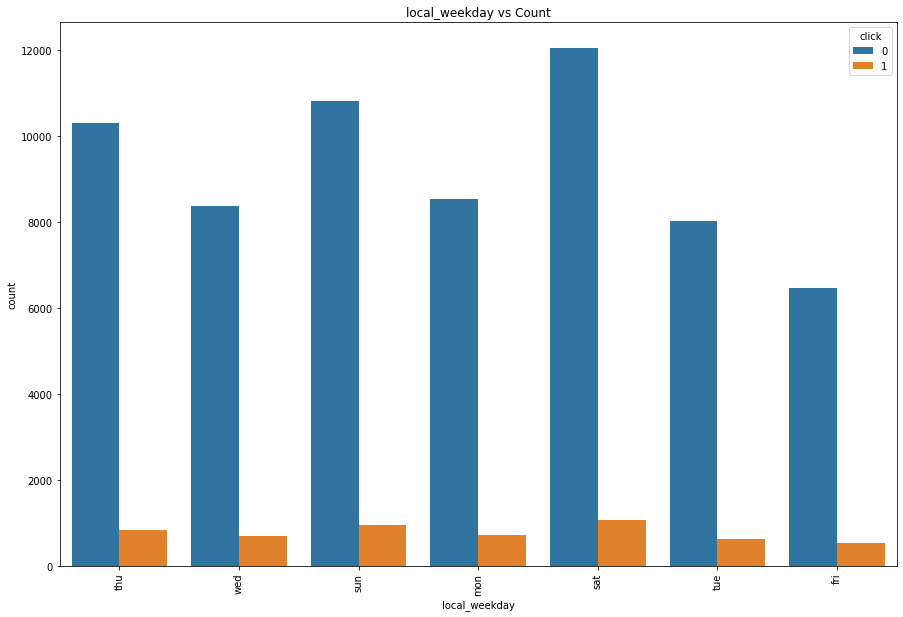

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(x="local_weekday", data=data_sample, hue ="click")
plt.title("local_weekday vs Count")
plt.xticks(rotation=90)

<p style="line-height:1.75;font-size:16px">
Relation exist between weekday to clicks

# Device Size & Clicks

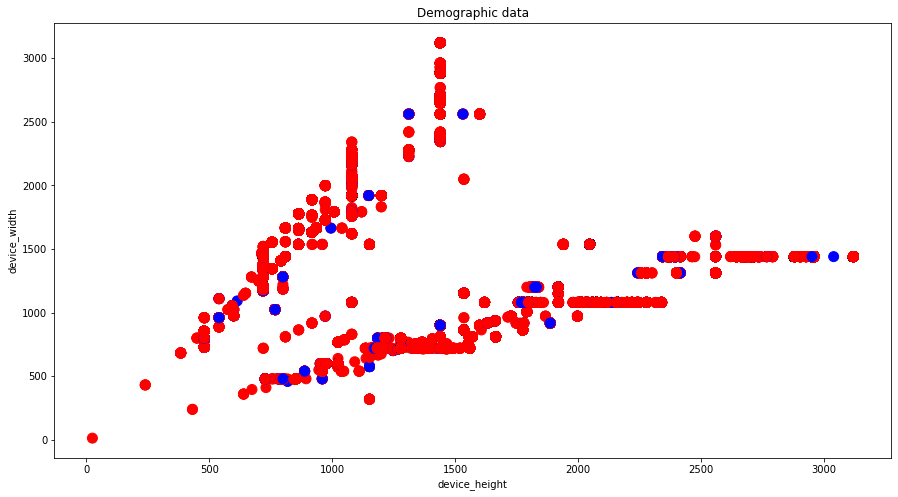

In [37]:
color_by_click = df['click'].apply(lambda x: 'r' if x == 0 else 'b')
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

ax.scatter(x=df['device_height'], y=df['device_width'], c=color_by_click, s=100)
ax.set_xlabel('device_height')
ax.set_ylabel('device_width')
ax.set_title('Demographic data')
plt.show()

<p style="line-height:1.75;font-size:16px">
It's hard to see relations between the clicks to the device height and width

In [63]:
!pip install imbalanced-learn
!pip install delayed

     |████████████████████████████████| 206 kB 42.2 MB/s eta 0:00:01
     |████████████████████████████████| 85 kB 6.3 MB/s  eta 0:00:01
     |████████████████████████████████| 72 kB 777 kB/s  eta 0:00:01


In [26]:
df.sample(5)

,utc_time,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,UTC_datetime,local_time_naive,local_time,local hour,local_weekday,category,score,installs
1058872,1538420954351,NY,Optimum Online,Samsung,SM-J327P,6.0.1,720,1280,0,2018-10-01 19:09:14,2018-10-01 15:09:14,2018-10-01 19:09:14-04:00,15,mon,GAME_SIMULATION,3.8,10000
968307,1538427311258,FL,T-Mobile USA,Samsung,SM-G950U,8.0.0,864,1661,0,2018-10-01 20:55:11,2018-10-01 16:55:11,2018-10-01 20:55:11-04:00,16,mon,GAME_RACING,4.2,50000000
347606,1537388141729,CA,T-Mobile USA,LG,MP260,7.0,720,1280,0,2018-09-19 20:15:42,2018-09-19 13:15:42,2018-09-19 20:15:42-07:00,13,wed,GAME_PUZZLE,4.5,10000000
2887299,1540828823489,IL,ShawneeLink Corporation,Motorola,XT1710-08,7.1.1,1080,1920,0,2018-10-29 16:00:23,2018-10-29 11:00:23,2018-10-29 16:00:23-05:00,11,mon,GAME_SIMULATION,4.2,1000000
1029491,1538264158240,CT,Comcast Cable,LG,MP260,7.0,720,1280,0,2018-09-29 23:35:58,2018-09-29 19:35:58,2018-09-29 23:35:58-04:00,19,sat,"GAME_EDUCATIONAL', 'FAMILY_EDUCATION",4.1,1000000


# Device OS ver VS Clicks

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '6.0.1'),
  Text(1, 0, '8.1.0'),
  Text(2, 0, '8.0.0'),
  Text(3, 0, '7.0'),
  Text(4, 0, '7.1.1'),
  Text(5, 0, '7.1.2'),
  Text(6, 0, '9'),
  Text(7, 0, '6.0')])

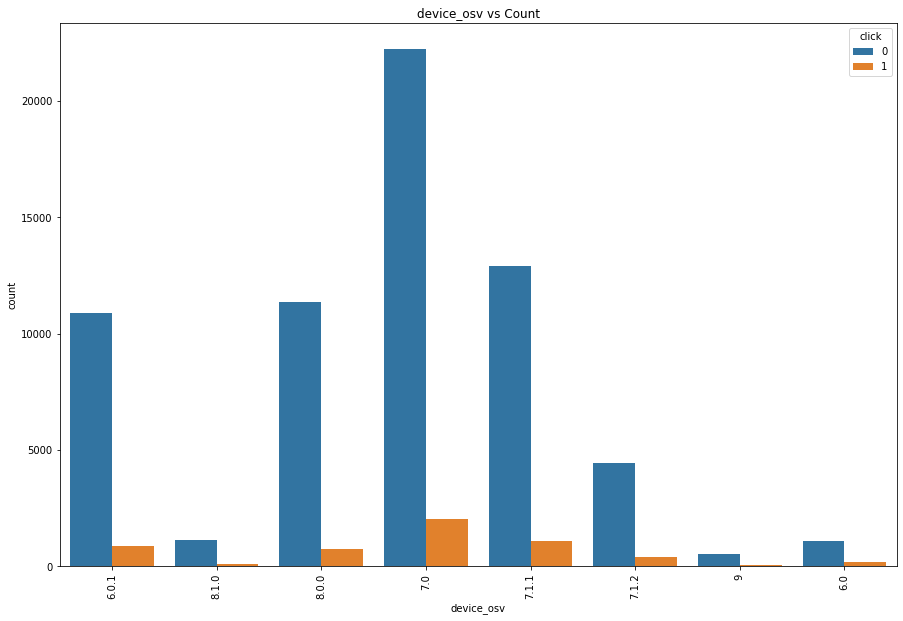

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(x="device_osv", data=data_sample, hue ="click")
plt.title("device_osv vs Count")
plt.xticks(rotation=90)

# Device Maker VS Clicks

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 [Text(0, 0, 'HTC'),
  Text(1, 0, 'Google'),
  Text(2, 0, 'Samsung'),
  Text(3, 0, 'LG'),
  Text(4, 0, 'ALCATEL'),
  Text(5, 0, 'ZTE'),
  Text(6, 0, 'OZing'),
  Text(7, 0, 'T-Mobile'),
  Text(8, 0, 'Oneplus'),
  Text(9, 0, 'Motorola'),
  Text(10, 0, 'ALCATEL ONE TOUCH'),
  Text(11, 0, 'RCA'),
  Text(12, 0, 'Coolpad'),
  Text(13, 0, 'Huawei'),
  Text(14, 0, 'BLU'),
  Text(15, 0, 'Cricket'),
  Text(16, 0, 'Kyocera'),
  Text(17, 0, 'ANS'),
  Text(18, 0, 'Asus'),
  Text(19, 0, 'Verizon'),
  Text(20, 0, 'Kakatech'),
  Text(21, 0, 'Unimax'),
  Text(22, 0, 'Essential

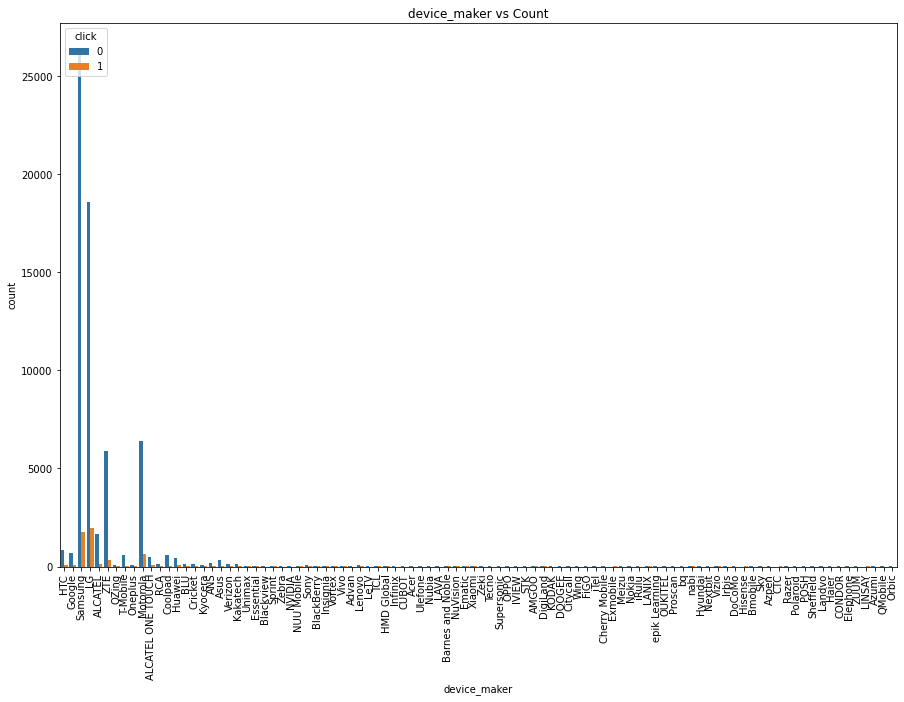

In [41]:
plt.figure(figsize=(15,10))
sns.countplot(x="device_maker", data=data_sample, hue ="click")
plt.title("device_maker vs Count")
plt.xticks(rotation=90)

<p style="line-height:1.75;font-size:16px">
Remove Noise

In [27]:
#get the most 20 device_maker
device_maker_list = df['device_maker'].value_counts()[:20].index.tolist()

In [28]:
df.drop(df[~df['device_maker'].isin(device_maker_list)].index, inplace=True)

In [29]:
df.shape

(1774308, 17)

# user_isp VS Clicks

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

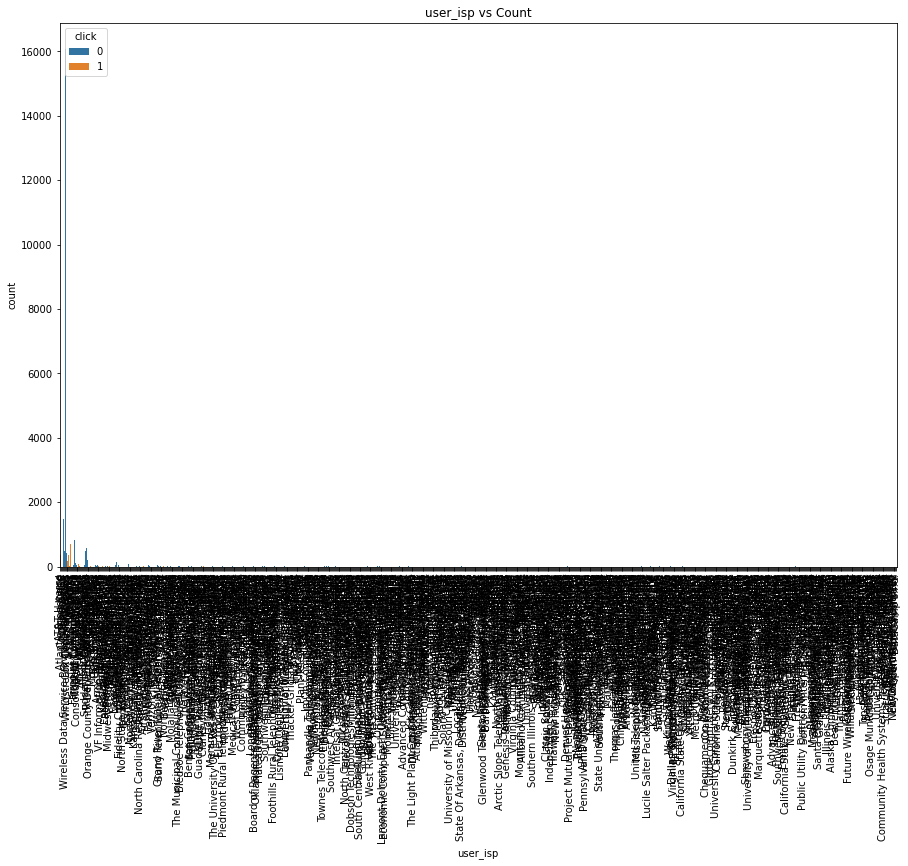

In [44]:
plt.figure(figsize=(15,10))
sns.countplot(x="user_isp", data=data_sample, hue ="click")
plt.title("user_isp vs Count")
plt.xticks(rotation=90)

<p style="line-height:1.75;font-size:16px">
Seems like noise - Remove user_isp column

In [30]:
df = df.drop(['user_isp'],axis=1)
data_sample = df.sample(70000)

# User State VS Clicks

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'CA'),
  Text(1, 0, 'TX'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'SC'),
  Text(4, 0, 'FL'),
  Text(5, 0, 'AZ'),
  Text(6, 0, 'NC'),
  Text(7, 0, 'AL'),
  Text(8, 0, 'PA'),
  Text(9, 0, 'GA'),
  Text(10, 0, 'IA'),
  Text(11, 0, 'VA'),
  Text(12, 0, 'WI'),
  Text(13, 0, 'AK'),
  Text(14, 0, 'LA'),
  Text(15, 0, 'TN'),
  Text(16, 0, 'OK'),
  Text(17, 0, 'MD'),
  Text(18, 0, 'RI'),
  Text(19, 0, 'WA'),
  Text(20, 0, 'MO'),
  Text(21, 0, 'IL'),
  Text(22, 0, 'NJ'),
  Text(23, 0, 'AR'),
  Text(24, 0, 'OH'),
  Text(25, 0, 'IN'),
  Text(26, 0, 'KY'),
  Text(27, 0, 'ID'),
  Text(28, 0, 'OR'),
  Text(29, 0, 'NM'),
  Text(30, 0, 'MI'),
  Text(31, 0, 'CO'),
  Text(32, 0, 'DE'),
  Text(33, 0, 'NV'),
  Text(34, 0, 'MS'),
  Text(35, 0, 'DC'),
  Text(36, 0, 'KS'),
  T

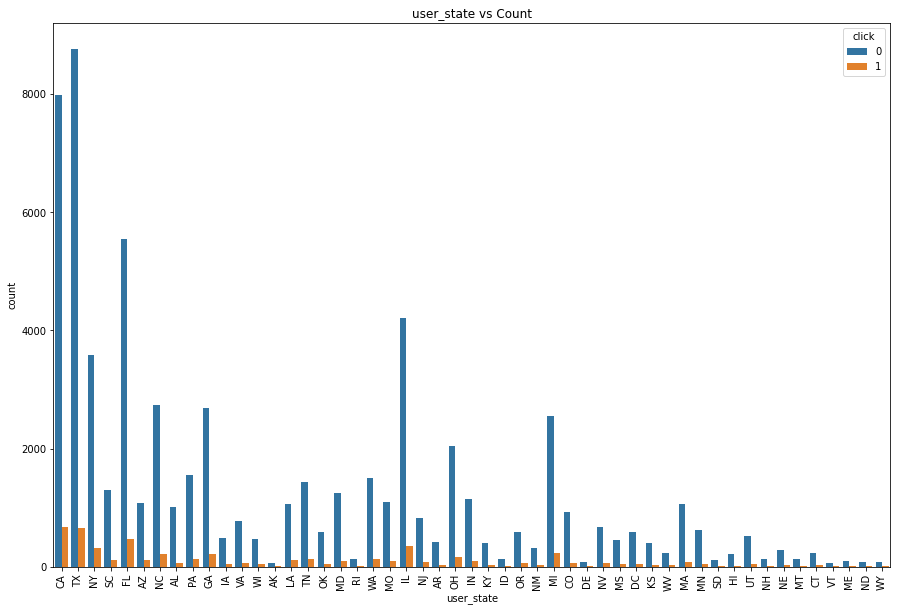

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(x="user_state", data=data_sample, hue ="click")
plt.title("user_state vs Count")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

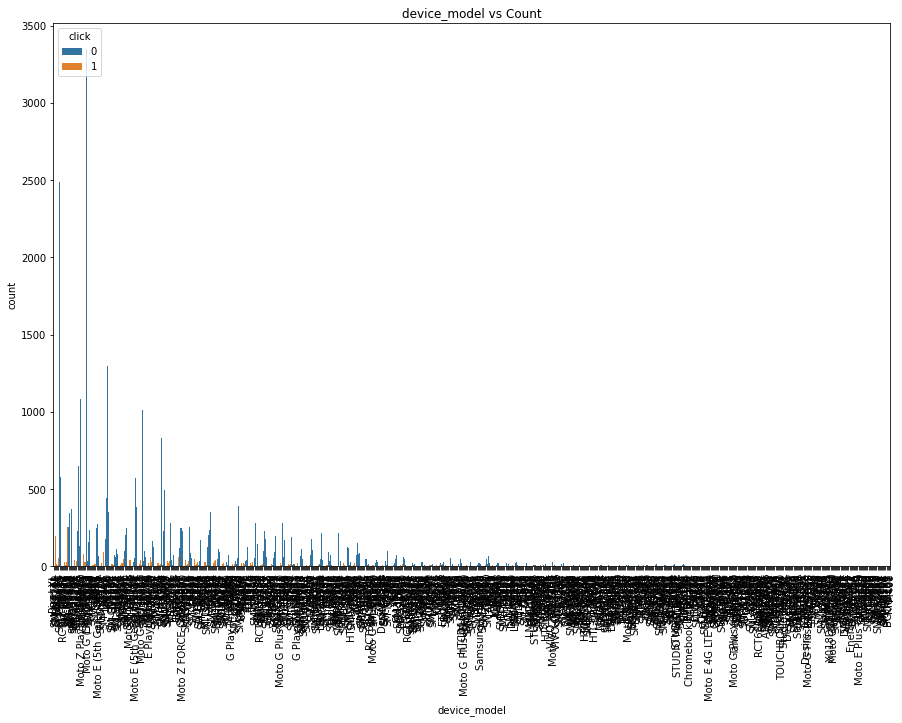

In [50]:
plt.figure(figsize=(15,10))
sns.countplot(x="device_model", data=data_sample, hue ="click")
plt.title("device_model vs Count")
plt.xticks(rotation=90)

In [31]:
df = df.drop(['device_model'],axis=1)
data_sample = df.sample(70000)

In [33]:
df.drop(['utc_time', 'UTC_datetime','local_time'], inplace=True ,axis=1)

In [34]:
df.sample(5)

,user_state,device_maker,device_osv,device_height,device_width,click,local_time_naive,local hour,local_weekday,category,score,installs
1721367,NC,Samsung,6.0.1,1280,720,0,2018-10-09 05:38:39,5,tue,GAME_CARD,4.9,500000
12636,ID,Samsung,6.0.1,1920,1080,0,2018-09-23 04:11:40,4,sun,GAME_CASUAL,4.2,5000000
2652563,FL,LG,7.0,720,1280,0,2018-09-17 07:24:12,7,mon,GAME_BOARD,4.7,500000
2669350,CO,Samsung,8.0.0,1920,1080,0,2018-10-01 16:27:14,16,mon,GAME_PUZZLE,4.4,1000000
1613040,GA,Samsung,6.0.1,1920,1080,0,2018-09-15 22:00:24,22,sat,GAME_CARD,4.7,1000000


# Label Encoding to numeric conversion

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

categ = ['user_state','device_maker','device_osv','local_weekday','local_weekday','category']

# Encode Categorical Columns
le = LabelEncoder()
for feat in categ:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1774308 entries, 0 to 2936920
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_state        int64         
 1   device_maker      int64         
 2   device_osv        int64         
 3   device_height     int64         
 4   device_width      int64         
 5   click             int64         
 6   local_time_naive  datetime64[ns]
 7   local hour        int64         
 8   local_weekday     int64         
 9   category          int64         
 10  score             float64       
 11  installs          int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 176.0 MB
None


In [36]:
df.sample(5)

,user_state,device_maker,device_osv,device_height,device_width,click,local_time_naive,local hour,local_weekday,category,score,installs
1638568,43,12,2,720,1280,0,2018-09-21 10:16:21,10,0,18,4.8,50000
210826,35,12,6,720,1280,0,2018-11-01 19:35:06,19,4,22,4.4,500000
1893563,9,13,5,720,1280,0,2018-11-09 08:50:20,8,0,48,4.3,5000000
979188,18,16,2,720,1280,0,2018-11-17 11:55:33,11,2,45,4.4,1000000
19059,14,13,8,720,1440,1,2018-09-27 17:27:41,17,4,30,4.1,1000000


# Save Data to CSV

In [37]:
df.to_csv('data_before_Scaling_new.csv')

In [38]:
dt_before_scale = df

# Rescaling the data 

<p style="line-height:1.75;font-size:16px">
Using MinMax Scaler

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['device_height','device_width','installs','score','user_state','device_maker',
               'device_osv','local hour','local_weekday']])
df[['device_height','device_width','installs','score','user_state','device_maker',
    'device_osv','local hour','local_weekday']] = scaler.transform(df[['device_height','device_width',
                                                                       'installs','score','user_state','device_maker',
                                                                       'device_osv','local hour','local_weekday']])
print('\nScaled Data')
df.sample(5)


Scaled Data


,user_state,device_maker,device_osv,device_height,device_width,click,local_time_naive,local hour,local_weekday,category,score,installs
2293826,0.84,0.631579,0.153846,0.922456,0.459111,0,2018-09-30 18:57:40,0.782609,0.500000,33,0.857143,0.00050
2642577,0.90,0.631579,0.153846,0.224556,0.407598,0,2018-10-27 07:47:24,0.304348,0.333333,41,0.714286,0.00100
363534,0.80,0.842105,0.076923,0.224556,0.407598,0,2018-09-20 13:32:29,0.565217,0.666667,21,0.809524,0.00100
1627500,0.72,1.000000,0.384615,0.612278,0.343207,0,2018-10-14 12:32:41,0.521739,0.500000,9,0.571429,0.00100
905253,0.18,0.000000,0.153846,0.147011,0.270444,0,2018-10-13 12:41:17,0.521739,0.333333,12,0.333333,0.00001


# Split the data Train and Test based on Dates

In [40]:
split_date = pd.datetime(2018,11,1)

df_train = df.loc[df['local_time_naive'] <= split_date]
df_test = df.loc[df['local_time_naive'] > split_date]

/tmp/ipykernel_36755/3159967903.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_date = pd.datetime(2018,11,1)


In [41]:
df = df.drop(['local_time_naive'],axis=1)

In [42]:
df.sample(3)

,user_state,device_maker,device_osv,device_height,device_width,click,local hour,local_weekday,category,score,installs
2261028,0.48,0.842105,0.615385,0.656866,0.343207,0,0.347826,0.500000,20,0.952381,0.0005
1264167,0.40,0.842105,0.615385,0.340872,0.613651,0,0.695652,0.000000,45,0.714286,0.0001
417581,0.36,1.000000,0.076923,0.147011,0.270444,0,0.565217,0.333333,41,0.761905,0.0100


# Train RandomForest Classifier on the scaled data

In [56]:
from sklearn.ensemble import RandomForestClassifier

X_train = df_train.drop(['click','local_time_naive'], axis=1)
y_train = df_train['click']
X_test = df_test.drop(['click','local_time_naive'], axis=1)
y_test = df_test['click']

rf = RandomForestClassifier(n_estimators=1000, max_depth=3)
rf.fit(X_train, y_train)
print(f'Train Score: {rf.score(X_train, y_train)}\nTest Score: {rf.score(X_test, y_test)}')

Train Score: 0.9235028150714595
Test Score: 0.9211432953986165


# Update the Imbalance data before it goes into the model

<p style="line-height:1.75;font-size:16px">
Using SMOTE technique

In [44]:
from imblearn.over_sampling import SMOTE

X = df.drop('click', axis=1)
y = df['click']

#oversampling the data
oversample_smote = SMOTE()
X_smote, y_smote = oversample_smote.fit_resample(X, y)

# Build RandomForest model 

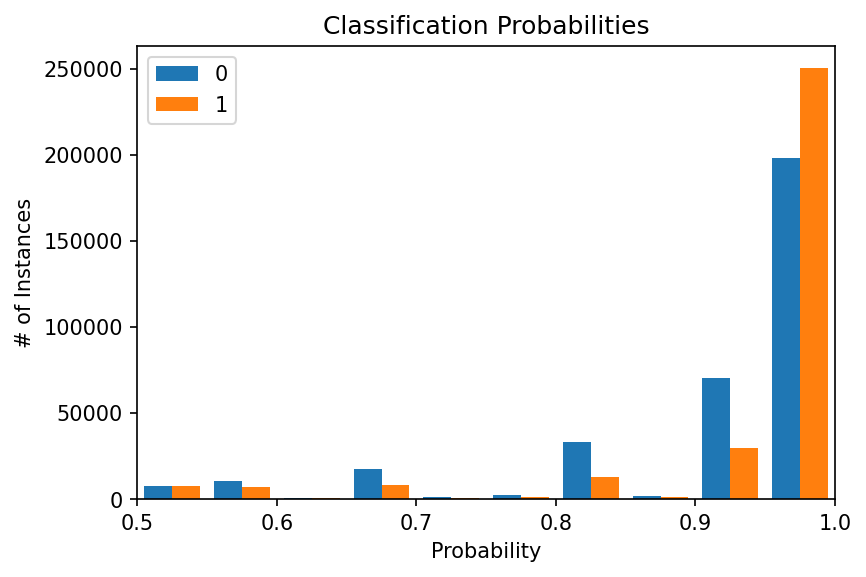

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline 

#Split the smote data 
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2)

target_names = [0, 1]

rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf.fit(X_train, y_train)

probas = rf_clf.predict_proba(X_test)

plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(target_names)
plt.show()

<p style="line-height:1.75;font-size:16px">
We can see that the threshold we select for the model will highly affect its performance 

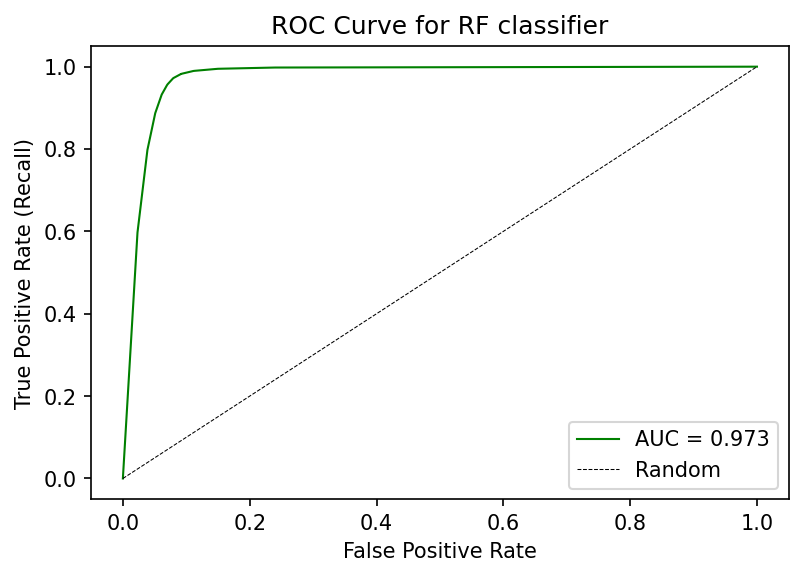

In [47]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], '--k', lw=0.5, label='Random')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import classification_report

y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    327369
           1       0.97      0.92      0.94    327750

    accuracy                           0.95    655119
   macro avg       0.95      0.95      0.95    655119
weighted avg       0.95      0.95      0.95    655119



<p style="line-height:1.75;font-size:20px;font-style:bold">
Best Accuracy! (oversampling the data - SMOTE -> Build RandomForest Classifier)

# KNN on the sclaed Data 

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote)
knn = KNeighborsRegressor(5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
r2_score_val = r2_score(y_pred, y_test)
print(f'RMSE: {rmse}, R2 Score: {r2_score_val}\n')


RMSE: 0.3355304343003272, R2 Score: 0.34151755485382873



# UnderSampling the Data using RandomUnderSampler 

In [62]:
#UnderSampling the scaled data

from imblearn.under_sampling import RandomUnderSampler


X_train = df_train.drop(['click','local_time_naive'], axis=1)
y_train = df_train['click']
X_test = df_test.drop(['click','local_time_naive'], axis=1)
y_test = df_test['click']

# Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# Build RandomForest Classifier on the undersampling data

In [63]:
#Build the Model
clf = RandomForestClassifier(n_estimators=100, max_depth=5)
clf.fit(X_undersampled, y_undersampled)
print(f'Train: {clf.score(X_undersampled, y_undersampled)}, Test: {clf.score(X_test, y_test)}')

Train: 0.6202273653698084, Test: 0.6384536645902719


<p style="line-height:1.75;font-size:16px">
We got score of 63%

In [64]:
y_pred_clf = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred_clf))
print(classification_report(y_test, y_pred_clf))

[[302190   2877]
 [ 25888    228]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    305067
           1       0.07      0.01      0.02     26116

    accuracy                           0.91    331183
   macro avg       0.50      0.50      0.49    331183
weighted avg       0.85      0.91      0.88    331183



<p style="line-height:1.75;font-size:16px">
Recall is very small 

# Building Naive Bayes Classifier

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

X_train = df_train.drop(['click','local_time_naive'], axis=1)
y_train = df_train['click']
X_test = df_test.drop(['click','local_time_naive'], axis=1)
y_test = df_test['click']


nb = GaussianNB()
nb.fit(X_train, y_train)
print(f'Naive Bayes: {nb.score(X_test, y_test)}')

Naive Bayes: 0.9131446964367133


In [59]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

y_pred_nb = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

[[302190   2877]
 [ 25888    228]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    305067
           1       0.07      0.01      0.02     26116

    accuracy                           0.91    331183
   macro avg       0.50      0.50      0.49    331183
weighted avg       0.85      0.91      0.88    331183



<p style="line-height:1.75;font-size:16px">
Accuracy is higher But Recall of 1 is very small.
Model predict right on Click = 1 only 1% 

# Build Logistic Regression Classifier

In [60]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f'Logistic Regression: {lr.score(X_test, y_test)}')

Logistic Regression: 0.9211432953986165


In [61]:
y_pred_lr = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[302190   2877]
 [ 25888    228]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    305067
           1       0.07      0.01      0.02     26116

    accuracy                           0.91    331183
   macro avg       0.50      0.50      0.49    331183
weighted avg       0.85      0.91      0.88    331183



<p style="line-height:1.75;font-size:16px">
The same recall of 1%

# Build DecisionTree Classifier on unscaled model 

In [65]:
#Split the Data
split_date = pd.datetime(2018,11,1)

df_train = dt_before_scale.loc[dt_before_scale['local_time_naive'] <= split_date]
df_test = dt_before_scale.loc[dt_before_scale['local_time_naive'] > split_date]

/tmp/ipykernel_36755/2884155567.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_date = pd.datetime(2018,11,1)


In [67]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4)

X_train = df_train.drop(['click','local_time_naive'], axis=1)
y_train = df_train['click']
X_test = df_test.drop(['click','local_time_naive'], axis=1)
y_test = df_test['click']

dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9211432953986165

In [68]:
y_pred_dtc = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

[[305067      0]
 [ 26116      0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96    305067
           1       0.00      0.00      0.00     26116

    accuracy                           0.92    331183
   macro avg       0.46      0.50      0.48    331183
weighted avg       0.85      0.92      0.88    331183



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<p style="line-height:1.75;font-size:16px">
Recall and Precision are bad

<p style="line-height:1.75;font-size:16px">
Data is not Imbalanced 

# Balance the Data & Build RandomForest Classifier 

<p style="line-height:1.75;font-size:16px">
Balance the data 3 techniques: Random Oversampling SMOTE Oversampling And Random Undersampling And Build RandomForest Classifier on each techniques 

In [73]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier


X_train = df_train.drop(['click','local_time_naive'], axis=1)
y_train = df_train['click']
X_test = df_test.drop(['click','local_time_naive'], axis=1)
y_test = df_test['click']

# Random Oversampling
oversampler = RandomOverSampler(sampling_strategy='minority')
X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

# SMOTE Oversampling
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

for X, y, method in [(X_oversampled, y_oversampled, 'Oversampling'), 
                     (X_smote, y_smote, 'SMOTE'), 
                     (X_undersampled, y_undersampled, 'Undersampling')]:
    clf = RandomForestClassifier(n_estimators=100, max_depth=5)
    clf.fit(X, y)
    print(f'Method: {method}')
    print(f'Train: {clf.score(X, y)}, Test: {clf.score(X_test, y_test)}')
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

Method: Oversampling
Train: 0.6185498938269567, Test: 0.6333537651389111
              precision    recall  f1-score   support

           0       0.95      0.64      0.76    305067
           1       0.12      0.59      0.20     26116

    accuracy                           0.63    331183
   macro avg       0.53      0.61      0.48    331183
weighted avg       0.88      0.63      0.72    331183

Method: SMOTE
Train: 0.733613335034103, Test: 0.7147105980681375
              precision    recall  f1-score   support

           0       0.94      0.74      0.83    305067
           1       0.13      0.46      0.20     26116

    accuracy                           0.71    331183
   macro avg       0.54      0.60      0.51    331183
weighted avg       0.88      0.71      0.78    331183

Method: Undersampling
Train: 0.6198831468816522, Test: 0.6396222028304593
              precision    recall  f1-score   support

           0       0.95      0.64      0.77    305067
           1       0.12  

<p style="line-height:1.75;font-size:16px">
We got the best score on the SMOTE Oversampling data
but Rendom Undersampling give best recall  
    

# Model Penalty

<p style="line-height:1.75;font-size:16px">
Lets see how class_weight effects the model results
Testing on the highly preformed technique - 
    SMOTE Oversampling

In [79]:
# split into train/test sets
X_train = df_train.drop(['click','local_time_naive'], axis=1)
y_train = df_train['click']
X_test = df_test.drop(['click','local_time_naive'], axis=1)
y_test = df_test['click']

# SMOTE Oversampling
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)


for weight in [5, 10, 100]:
    # fit a model
    clf = RandomForestClassifier(n_estimators=100, max_depth=7, class_weight='balanced')
    clf.fit(X_smote, y_smote)

    print(f'Weight: {weight}')
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

Weight: 5
              precision    recall  f1-score   support

           0       0.94      0.79      0.86    305067
           1       0.14      0.41      0.21     26116

    accuracy                           0.76    331183
   macro avg       0.54      0.60      0.54    331183
weighted avg       0.88      0.76      0.81    331183

Weight: 10
              precision    recall  f1-score   support

           0       0.94      0.79      0.86    305067
           1       0.14      0.41      0.21     26116

    accuracy                           0.76    331183
   macro avg       0.54      0.60      0.53    331183
weighted avg       0.88      0.76      0.81    331183

Weight: 100
              precision    recall  f1-score   support

           0       0.94      0.80      0.87    305067
           1       0.15      0.39      0.21     26116

    accuracy                           0.77    331183
   macro avg       0.54      0.60      0.54    331183
weighted avg       0.88      0.77      0.

<p style="line-height:1.75;font-size:16px">
The wights with the best scores are 5 ot 10

# Random Forest With Class Weighting

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

X_train = df_train.drop(['click','local_time_naive'], axis=1)
y_train = df_train['click']
X_test = df_test.drop(['click','local_time_naive'], axis=1)
y_test = df_test['click']


# Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)


# define model
clf = RandomForestClassifier(n_estimators=10, class_weight='balanced')
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print (classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    305067
           1       0.19      0.04      0.07     26116

    accuracy                           0.91    331183
   macro avg       0.56      0.51      0.51    331183
weighted avg       0.87      0.91      0.88    331183



<p style="line-height:1.75;font-size:16px">
Recall is not good

#  Gradient Boosting classifier

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

# Split into train/test
X_train = df_train.drop(['click','local_time_naive'], axis=1)
y_train = df_train['click']
X_test = df_test.drop(['click','local_time_naive'], axis=1)
y_test = df_test['click']

# Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# Iterate over different learning rates and fit a classifier
for lr in [0.01, 0.1, 1, 2]:
    gbc = GradientBoostingClassifier(learning_rate=lr, min_samples_leaf=5)
    gbc.fit(X_undersampled, y_undersampled)
    # Print the classifier's score
    print(f'Train ({lr}): {gbc.score(X_undersampled, y_undersampled)}')
    print(f'Test ({lr}): {gbc.score(X_test, y_test)}')
    y_pred = gbc.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Train (0.01): 0.6132659993659133
Test (0.01): 0.6464311272015774
[[199302 105765]
 [ 11331  14785]]
              precision    recall  f1-score   support

           0       0.95      0.65      0.77    305067
           1       0.12      0.57      0.20     26116

    accuracy                           0.65    331183
   macro avg       0.53      0.61      0.49    331183
weighted avg       0.88      0.65      0.73    331183

Train (0.1): 0.6308845509307487
Test (0.1): 0.6480435288043166
[[198916 106151]
 [ 10411  15705]]
              precision    recall  f1-score   support

           0       0.95      0.65      0.77    305067
           1       0.13      0.60      0.21     26116

    accuracy                           0.65    331183
   macro avg       0.54      0.63      0.49    331183
weighted avg       0.89      0.65      0.73    331183

Train (1): 0.6487431495991667
Test (1): 0.6052544967585897
[[183751 121316]
 [  9417  16699]]
              precision    recall  f1-score   support


<p style="line-height:1.75;font-size:16px">
Train a new classifier, with the best learning rate according to results

In [90]:
gbc = GradientBoostingClassifier(learning_rate=0.1, min_samples_leaf=5)
gbc.fit(X_undersampled, y_undersampled)

y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[198916 106151]
 [ 10411  15705]]


In [92]:
!aws s3 cp /home/ubuntu/notebooks/intro_to_ml/day_6/FinalProject-Naama-TestData2.ipynb s3://uatt-e2-naamaz

upload: ./FinalProject-Naama-TestData2.ipynb to s3://uatt-e2-naamaz/FinalProject-Naama-TestData2.ipynb
